Chapter:4-Classification, q10

In [1]:
library(ISLR)

# (a)

In [5]:
summary(Weekly)

      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

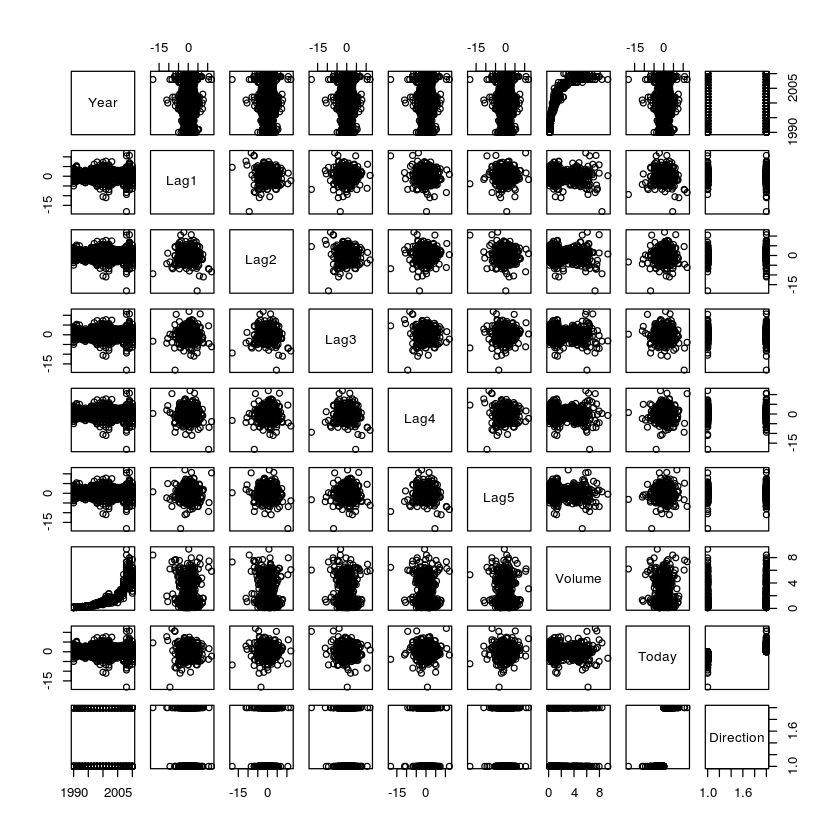

In [6]:
pairs(Weekly)

The weekly returns remains almost constant between the years 1990 and 2010. However during the same time the volume traded has increased exponentially. 

# (b)

In [8]:
glm.fit = glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume,data=Weekly, family=binomial)
summary(glm.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


The P-value associated with the z-value of coefficient of Lag2 is close to zero and therefore the coefficient of Lag2 is statistically significant.

# (c)

In [19]:
glm.probs = predict(glm.fit,newdata=Weekly,type="response")
glm.pred = rep("Down",length(Weekly$Direction))
glm.pred[glm.probs>0.5]="Up"
table(glm.pred,Weekly$Direction)

        
glm.pred Down  Up
    Down   54  48
    Up    430 557

In [17]:
#fraction of correct prediction
mean(glm.pred==Weekly$Direction)*100

[1] 56.10652

According to the Confusion matrix the number of false positives are very high.

In [20]:
#Up prediction accuracy
557/(430+557)*100

[1] 56.43364

If the model predicts that market goes up, it is correct 56.43% of the time.

In [21]:
#Down Prediction accuracy
54/(54+48)*100

[1] 52.94118

If the model predicts that the market goes down, it is correct 52.94% of the time.

# (d)

In [29]:
training = (Weekly$Year<2009)
training_data = Weekly[training,]
test_data = Weekly[!training,]
glm.fit2 = glm(Direction~Lag2,data=training_data,family=binomial)
summary(glm.fit2)


Call:
glm(formula = Direction ~ Lag2, family = binomial, data = training_data)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.536  -1.264   1.021   1.091   1.368  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.20326    0.06428   3.162  0.00157 **
Lag2         0.05810    0.02870   2.024  0.04298 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1354.7  on 984  degrees of freedom
Residual deviance: 1350.5  on 983  degrees of freedom
AIC: 1354.5

Number of Fisher Scoring iterations: 4


In [35]:
glm.probs2 = predict(glm.fit2,newdata=test_data,type="response")
glm.pred2 = rep("Down",length(test_data$Direction))
glm.pred2[glm.probs2>0.5]="Up"
table(glm.pred2,test_data$Direction)

         
glm.pred2 Down Up
     Down    9  5
     Up     34 56

In [37]:
#Overall prediction accuracy
mean(glm.pred2==test_data$Direction)*100

[1] 62.5

In [38]:
#Up prediction accuracy
56/(56+34)*100

[1] 62.22222

When the model predicts that the market goes up, it is correct 62.2% of the time.

In [39]:
#Down prediction accuracy
9/(9+5)*100

[1] 64.28571

When the model predicts that the market goes down, it is correct 64.3% of the time.

# (e)

In [44]:
#LDA
library(MASS)
lda.fit = lda(Direction~Lag2,data=training_data)
lda.fit

Call:
lda(Direction ~ Lag2, data = training_data)

Prior probabilities of groups:
     Down        Up 
0.4477157 0.5522843 

Group means:
            Lag2
Down -0.03568254
Up    0.26036581

Coefficients of linear discriminants:
           LD1
Lag2 0.4414162

In [47]:
lda.pred = predict(lda.fit,newdata=test_data)
table(lda.pred$class,test_data$Direction)

      
       Down Up
  Down    9  5
  Up     34 56

In [49]:
#Overall prediction accuracy
mean(lda.pred$class==test_data$Direction)*100

[1] 62.5

In [50]:
#Up prediction accuracy
56/(34+56)*100

[1] 62.22222

When the model predicts that the model goes up, it is correct 62.2% of the time

In [51]:
#Down prediction accuracy
9/(9+5)*100

[1] 64.28571

When the model predicts that the model goes down, it is correct 64.3% of the time

# (f)

In [54]:
#QDA
qda.fit = qda(Direction~Lag2,data=training_data)
qda.fit

Call:
qda(Direction ~ Lag2, data = training_data)

Prior probabilities of groups:
     Down        Up 
0.4477157 0.5522843 

Group means:
            Lag2
Down -0.03568254
Up    0.26036581

In [56]:
qda.pred = predict(qda.fit, newdata=test_data)
table(qda.pred$class,test_data$Direction)

      
       Down Up
  Down    0  0
  Up     43 61

In [65]:
#Overall prediction accuracy
mean(qda.pred$class==test_data$Direction)*100

[1] 58.65385

In [62]:
#Up prediction accuracy
61/(61+43)*100

[1] 58.65385

When the model predicts that the market goes up, it is correct 58.65% of the time

# (g)

In [94]:
library(class)
knn_train = matrix(training_data$Lag2)
knn_train_y = training_data$Direction
knn_test = matrix(test_data$Lag2)
knn_test_y = test_data$Direction
set.seed(1)
knn.pred = knn(knn_train,knn_test,knn_train_y,prob=FALSE,k=1)
table(knn.pred,knn_test_y)

        knn_test_y
knn.pred Down Up
    Down   21 30
    Up     22 31

In [95]:
#Overall prediction accuracy
mean(knn.pred==knn_test_y)*100

[1] 50

In [97]:
#Up prediction accuracy
31/(31+22)*100

[1] 58.49057

When the model predicts that the market goes up, it is correct 58.49% of the time.

In [98]:
#Down prediction accuracy
21/(21+30)*100

[1] 41.17647

When the model predicts that the market goes down, it is correct 41.18% of the time.

# (h)

The LDA and Logistic Regression models both perform equally well and better than other models. 

# (i)

In [104]:
lda.fit2 = lda(Direction~Lag2+I(Lag2^2),data=training_data)
lda.fit2

Call:
lda(Direction ~ Lag2 + I(Lag2^2), data = training_data)

Prior probabilities of groups:
     Down        Up 
0.4477157 0.5522843 

Group means:
            Lag2 I(Lag2^2)
Down -0.03568254  4.828121
Up    0.26036581  5.428657

Coefficients of linear discriminants:
                 LD1
Lag2      0.43203575
I(Lag2^2) 0.02957998

In [109]:
lda.pred2 = predict(lda.fit2,newdata=test_data)
mean(lda.pred2$class==test_data$Direction)*100

[1] 61.53846

# Training a KNN model using all predictors

In [111]:
knn_train = scale(training_data[,-ncol(training_data)])
knn_train_y = training_data$Direction
knn_test = scale(test_data[,-ncol(test_data)])
knn_test_y = test_data$Direction

In [114]:
library(class)
knn.pred = knn(knn_train,knn_test,knn_train_y,k=3)

In [115]:
#Prediction accuracy
mean(knn.pred==knn_test_y)*100

[1] 87.5

In [117]:
table(knn.pred,knn_test_y)

        knn_test_y
knn.pred Down Up
    Down   36  6
    Up      7 55

In [118]:
#Up prediction accuracy
55/(55+7)*100

[1] 88.70968

When the model predicts that the market goes up, it is correct 88.7% of the time.

In [119]:
#Down prediction accuracy
36/(36+6)*100

[1] 85.71429

When the model predicts that the market goes down, it is correct 85.7% of the time.